# HOUSE PRICE PREDICTIONS OF RESIDENTIAL HOMES IN IOWA

In this data the goal is to predict house prices in Iowa based on information that is split into train and test csv, the train.csv will be used for training our machine learning model and the test.csv will be used for fitting the models evaluations to predict the Sale prices. Each csv has 81 columns of various factors that affect the prices of a location and it's real estate like the building class, zone classification, street, alley, proximity, measurement of house in square feet, basement etc.In all the dataset is extensive and may have redundant values that would create noise in our machine learning model so in order to reduce the no of columns and extract only the most crucial points of analysis for our model I would be implementing the Principal Component Analysis or PCA method to reduce the no of columns and then use the cleaned data to create various machine learning models to predict the target variable here which is Sale Price for each house against it's respective unique ID. Here is the data dictionary that describes the meaning of each variable or column :-

DATA DICTIONARY :-

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale


As it's understandable that the data has a lot of repeat and similar columns that can be grouped together so I will  aim to analyze and reduce the no of columns to a reasonable no of columns for making a robust predictive model.


DATA ANALYSIS

In [1]:
# import the pandas and numpy library for data wrangling and analysis.

import pandas as pd 
import numpy as np

In [2]:
# Reading the files with pandas

train = pd.read_csv("./housepricetrain.csv")
test = pd.read_csv("./housepricetest.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal


So the test csv has 80 columns as the saleprice column will be supplied later to base our predictions on after the training data has been trained by the model.

In [5]:
# Checking the Number of missing values with the isnull function 

train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
X3SsnPorch       0
ScreenPorch      0
PoolArea         0
PoolQC      

In [6]:
train.shape

(1460, 81)

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Of the 81 columns given only 38 are numerical. The target variable 'sale price' has 1460 house prices with an average sale price at 180921 and a standard deviation of 79442 , the minimum house price is 34900 and the maximum house price is 755000. 25% of the houses have a sale price of up to 129975, 50% houses are up to 163000 in sales price and 75% have the sale price of up to 214000.

DATA VISUALIZATION

In [8]:
# import seaborn and matplotlib for visualizations 

import seaborn as sns
import matplotlib.pyplot as plt

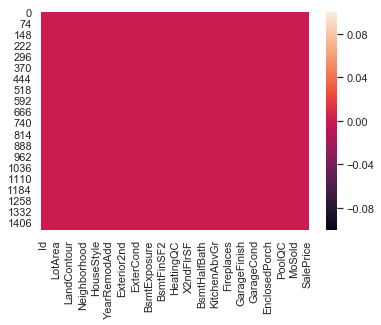

In [100]:
# Visualizing the missing data if any


sns.heatmap(train.isnull())

The heatmap is a uniform red color which indicates the absence of any missing values from the data.

/Users/nehatalwar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Impact of Neighborhood on Sale prices \n\n')

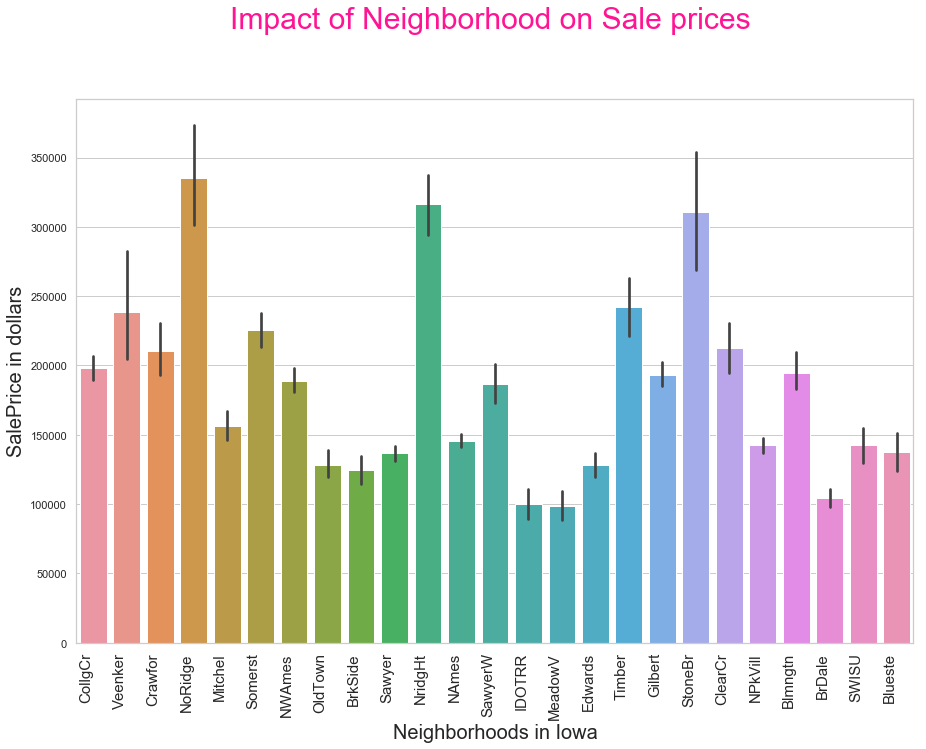

In [98]:
# let's visualize the affect of key factors like the neighbourhood on the sale price, the target variable

plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'Neighborhood' , y = 'SalePrice' , data = train )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right" , fontsize = 15)

plt.xlabel('Neighborhoods in Iowa' , size =20)
plt.ylabel('SalePrice in dollars' , size = 20)
plt.title('Impact of Neighborhood on Sale prices \n\n' , size = 30, color = 'deeppink')



The bar plot clearly depicts that Noridge , Nright and ClearCr are the neighborhoods with the highest priced houses.

Text(0.5,1,'Impact of Lot area on Sale prices \n\n')

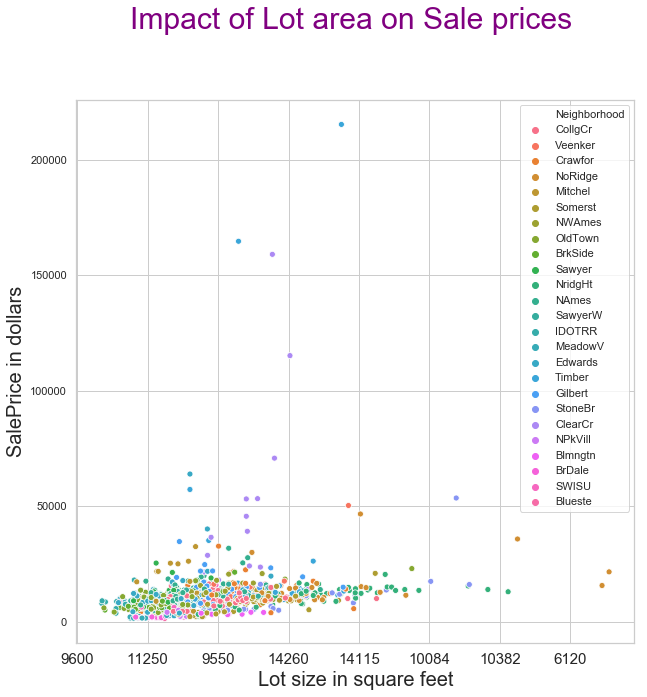

In [97]:
# let's visualize the affect of the lot area on the sale price

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'SalePrice', y = 'LotArea', data = train , hue = 'Neighborhood')
ax.set_xticklabels(labels = train['LotArea'], fontsize = 15)

plt.xlabel('Lot size in square feet' , size = 20)
plt.ylabel('SalePrice in dollars' , size = 20)
plt.title('Impact of Lot area on Sale prices \n\n'  , size = 30, color = 'purple' )



As can be seen here most of the lot areas lie between the range 11000 and 14000 sq ft and the sale price is mostly up to $5000 per sq ft.A few outliers can be seen which have Saleprices as high as 100000 and above for lots that have approx 14000 area belonging to the ClearCr area which had the highest selling houses as seen in the last plot.Houses in the areas such as Timber and Gilbert too have similar, high-priced houses.



/Users/nehatalwar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Impact of Building type on Sale price \n \n ')

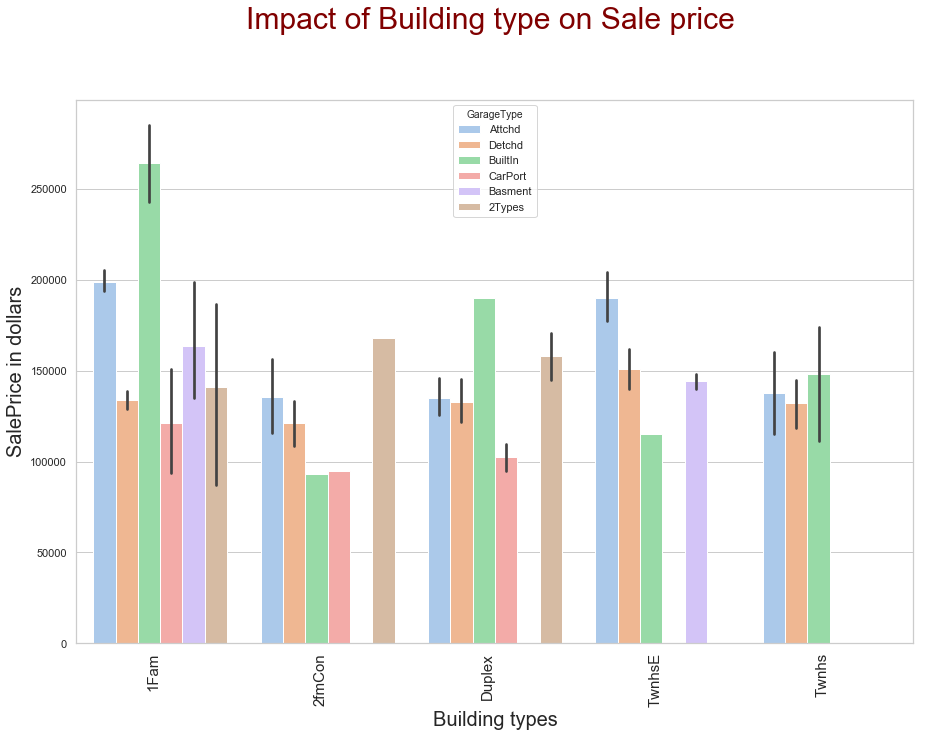

In [93]:

# let's visualize the affect of key factors like the Salecondition on the sale price, the target variable

plt.figure(figsize=(15,10))

ax = sns.barplot(x = 'BldgType' , y = 'SalePrice' , data = train, hue = 'GarageType' )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right" , fontsize = 15)

plt.xlabel('Building types' , size =20)
plt.ylabel('SalePrice in dollars' , size = 20)
plt.title('Impact of Building type on Sale price \n \n ' , size = 30 , color = 'maroon')




The bar plot shows that 1 family condos and duplex houses with a builtin garage type have the highest selling price which is above 250000 and 180000 respectively and is followed by attached garage type at 190000 and 135000 approx. In the 2 family condo type , the garage style that is highest selling is 2 types of garage at 160000 approx. Townhomes and townhouses prefer the built in garage style with a selling price of 190000 130000 approx. Basement parking is also a high seller for 1 family condos.

SPLITTING THE DATA INTO TRAIN AND TEST

In [13]:
# Dividing my data into predictor variables and target variables as x and y

x = train.drop("SalePrice" , axis = 1)
x.head()

# the target variable saleprice is dropped so only 80 columns remain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [14]:
# saving the saleprice column in variable y as a pandas series

y = train["SalePrice"]
y.head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [15]:
# using the get_dummies function from pandas to convert categorical values to dummy/indicator variables such as 0 
# and 1 for easier processing by our model

newtrain = pd.get_dummies(train)
newtest = pd.get_dummies(test)

newtrain.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,196,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,162,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60,9550,7,5,1915,1970,0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84,14260,8,5,2000,2000,350,655,...,0,0,0,1,0,0,0,0,1,0


All categorical columns above have been replaced with dummy variables 0 and 1 so that we can proceed with our further processing of the data.

# PRINCIPAL COMPONENT ANALYSIS

I will be importing the scikit learn or sklearn library for implementing PCA and for building the machine learning models. Sklearn is an Open-source ML library for Python and it provides many unsupervised and supervised learning algorithms, It's built upon technology like NumPy, pandas, and Matplotlib.  This library features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

In [16]:
# import the standardscaler function from sklearn.preprocessing library

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


The standardscaler function Standardizes features by removing the mean and scaling to unit variance or
in other words makes the mean = 0 and std deviation = 1 , this is called nomalizing the data.
Standardization of a dataset is a common requirement for many machine learning estimators otherwise they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [17]:
# the fit_transform function will fit the training data and then transform it or the "fit" part applies to the feature
# extractor itself: it determines what features it will base future transformations on. The "transform" part is what 
# takes the data and returns some transformed data back.

scaledtrain = ss.fit_transform(newtrain)
scaledtrain = pd.DataFrame(scaledtrain)

# assign column names to the scaled train dataframe from the newtrain dataframe that includes adding the 
# SalePrice column
scaledtrain.columns = newtrain.columns

# Similarly we scale our test data as well
scaledtest = ss.fit_transform(newtest)
scaledtest = pd.DataFrame(scaledtest)

# assign column names to the scaled test dataframe from the newtest dataframe
scaledtest.columns = newtest.columns

scaledtrain.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [18]:
scaledtrain.shape


(1460, 290)

In [19]:
# Saleprice has been added back to scaledtrain

print(scaledtrain['SalePrice'].head())

0    0.347273
1    0.007288
2    0.536154
3   -0.515281
4    0.869843
Name: SalePrice, dtype: float64


After scaling the data we have 290 columns with us.

In [20]:
# Separately saving Sale price column from the scaled train data before applying PCA in a pandas series called y 
# so that we can use it in our models later.

y = scaledtrain.SalePrice
y.head()


0    0.347273
1    0.007288
2    0.536154
3   -0.515281
4    0.869843
Name: SalePrice, dtype: float64

In [21]:
# import PCA function to create principal components so we can reduce the no of columns

from sklearn.decomposition import PCA

pca = PCA(n_components = 120)
# n_components is the minimum Number of components to keep


The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent.

In [22]:
# Once again using fit_transform to fit the data back after the PCA

finaltrain = pca.fit_transform(scaledtrain)
finaltrain = pd.DataFrame(finaltrain)
finaltrain.shape


(1460, 120)

In [23]:
finaltrain.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,4.230530,-1.729403,-2.072153,1.961579,0.234810,-1.368641,0.671490,-0.555308,0.618518,-0.991306,...,0.146945,0.420249,-0.833144,0.267997,0.448322,-0.054795,0.493275,-0.317721,0.327293,-0.477283
1,0.035627,3.316918,-0.733152,0.272938,0.373955,-0.529914,-0.939286,0.676694,0.637490,-1.249861,...,1.053038,0.411382,1.281155,-0.834717,0.094892,1.478310,0.851781,0.138121,0.950482,0.571434
2,5.033740,-0.745806,-1.341305,2.662864,0.825538,-2.128873,0.558652,-0.668123,1.067861,-1.373501,...,-0.847951,-0.194536,-0.586043,-0.014005,0.793734,-0.178004,0.454035,0.126689,-0.145232,-0.124934
3,-2.057289,-1.062123,1.926198,1.337406,-0.610421,-0.989521,-2.316189,0.168392,-0.110726,1.043914,...,1.476606,-0.394825,-1.235451,0.156982,0.426075,-1.607789,-0.338163,0.285436,-1.021984,-0.403482
4,6.756227,-0.248939,0.681753,3.876424,0.365720,-1.293174,0.903283,-1.696189,0.931465,-1.704278,...,0.035427,-1.028160,0.800061,-0.074566,-0.879764,-0.637433,-0.947529,0.061274,-0.812568,0.689997


In [24]:
# Applying PCA to test data as well and fit and transform it back to a dataframe

finaltest = pca.fit_transform(scaledtest)
finaltest = pd.DataFrame(finaltest)
finaltest.shape


(1459, 120)

As can be seen both train and test data have 120 columns each after the PCA.

In [25]:
finaltest.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-3.307062,2.716226,-1.480369,0.948323,-2.055706,-0.674902,-0.138254,-0.210998,1.985074,-1.304242,...,-1.078175,0.252779,2.689467,0.599384,-0.492623,0.111560,1.643417,0.348701,0.008466,-1.346511
1,-1.108049,4.938887,1.657366,-0.443859,-1.648821,-3.088568,0.147339,1.845942,1.097983,-3.973570,...,-0.964934,-0.144961,2.489357,-2.603185,0.456419,-1.428044,1.135456,1.410619,-0.196793,-2.892318
2,2.462896,-0.684255,-2.588324,-2.844963,0.423628,1.031565,0.002945,0.316784,-2.158968,-0.375325,...,0.319292,0.101376,0.245042,-0.299079,-0.389159,0.324795,-0.264757,0.276883,-0.304357,-0.022425
3,3.188156,-1.136278,-1.818153,-2.424911,-0.126063,0.056177,-0.279193,-0.204669,-1.589253,-0.957410,...,-0.112477,-0.195062,0.603872,0.435197,-0.152067,-0.736938,0.145605,-0.093993,-0.295674,0.681117
4,2.936506,-0.032934,-1.761866,3.154140,0.882246,1.063060,-0.015001,0.558534,-1.275211,-0.348478,...,-1.220965,0.479063,0.341270,0.022709,-0.157069,0.046765,-0.670138,-0.372067,0.800742,-0.389124


BUILDING MACHINE-LEARNING MODELS AND PREDICTIONS

# LINEAR REGRESSION

In [26]:
# The first model is based on linear regresion algorithm.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()


The purpose of linear regression is to "predict" the value of the dependent variable based upon the values of one or more independent variables. Here we are predicting the dependent variable Sale price based on various independent variables.

In [27]:
# fit will take in x as the training data and y as the target values and returns a linear regression model instance
# of those values that we can use for prediction

lr.fit(finaltrain , y )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# Making the prediction of the model on the test data and generates values for Sale Price and 
# it returns an array of predicted values

pred_lr = lr.predict(finaltest)
pred_lr


array([-0.6542412 ,  0.882073  , -0.00433696, ..., -0.22150337,
       -0.36460306,  0.71741528])

In [101]:
# Generating a list of ID's from the ID's in the test data

ID = test["Id"].values.tolist()


In [30]:
# This is an important step where before inverse transforming pred_lr i have to first scale, fit and transform the 
# target variable SalePrice from the original train data as it has been used as y or the target values 
# in pred_lr model to make predictions on and it will affect pred_lr values so as a pre-requisite it needs to be 
# fitted and transformed before the inverse transformation 

scaledtarget = ss.fit_transform(pd.DataFrame(train.SalePrice))
scaledtarget



array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [31]:
# now inverse transform pred_lr as it had been fitted and transformed earlier and has to be restored back to the 
# original state

prediction = ss.inverse_transform(pred_lr)


In [32]:
# putting the solution into a dataframe of ID"s and Saleprice columns

solution = pd.DataFrame({"Id" : ID , "SalePrice" : prediction})


In [33]:
solution.head()

,Id,SalePrice
0,1461,128964.440280
1,1462,250971.280685
2,1463,180576.774748
3,1464,199022.097783
4,1465,164778.351412


So here are the predictions for sale price of each house according to the id no given by the linear regression model.

In [34]:
#solution.to_csv("Linearmodel.csv", index = False)

Text(0.5,1,'HOUSE PRICE PREDICTIONS BY THE LINEAR REGRESSION MODEL \n\n')

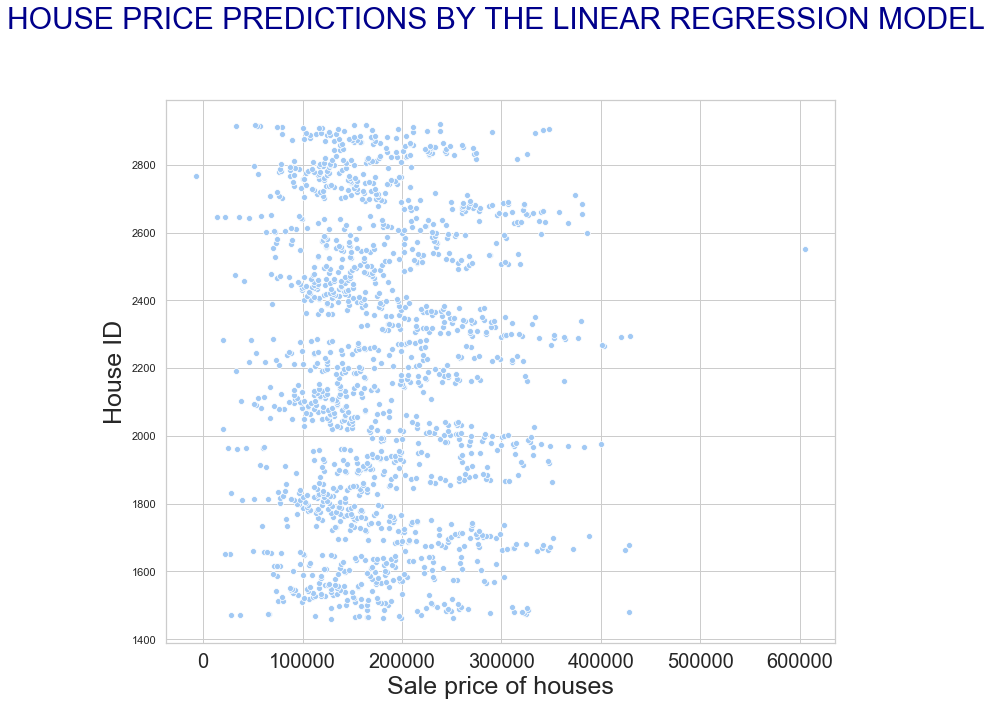

In [89]:
# To plot the results in a scatterplot

plt.figure(figsize=(12,10))
sns.scatterplot(x = 'SalePrice', y = 'Id' , data = solution);
plt.xlabel('Sale price of houses' , size = 25)
plt.ylabel('House ID' , size = 25)
plt.xticks(size = 20)
plt.title('HOUSE PRICE PREDICTIONS BY THE LINEAR REGRESSION MODEL \n\n' , size = 30 , color = 'darkblue')




# The linear model has predicted sale prices of most houses in the range of 100000 to 300000 as most values lie in that range .

# RANDOM FOREST  MODEL

The random forest model combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.The model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer. A decision tree is a decision tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

In [36]:
# import the algorithms from sklearn library

from sklearn.ensemble import RandomForestRegressor , BaggingRegressor , AdaBoostRegressor


/Users/nehatalwar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
# Create an instance of the random forest regressor

rf = RandomForestRegressor()


In [38]:
# Now fit the training data and target values to the model

rf.fit(finaltrain , y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
# make the prediction with the random forest model

pred_rf = rf.predict(finaltest)
pred_rf


array([-0.67916637,  0.59596588, -0.18285138, ..., -0.28056556,
       -0.63817931,  0.02150473])

In [40]:

scaledtarget = ss.fit_transform(pd.DataFrame(train.SalePrice))
scaledtarget


array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [41]:
# inverse transform the predictions

pred_rf = ss.inverse_transform(pred_rf)
pred_rf


array([126985., 228250., 166400., ..., 158640., 130240., 182629.])

In [42]:
solution2 = pd.DataFrame({"Id" : ID , "SalePrice" : pred_rf})

In [43]:
solution2.head()

,Id,SalePrice
0,1461,126985.0
1,1462,228250.0
2,1463,166400.0
3,1464,183602.9
4,1465,184230.0


In [44]:
# solution2.to_csv("rfmodel.csv" , index = False)

Text(0.5,1,'HOUSE PRICE PREDICTIONS BY THE RANDOM FOREST MODEL \n\n')

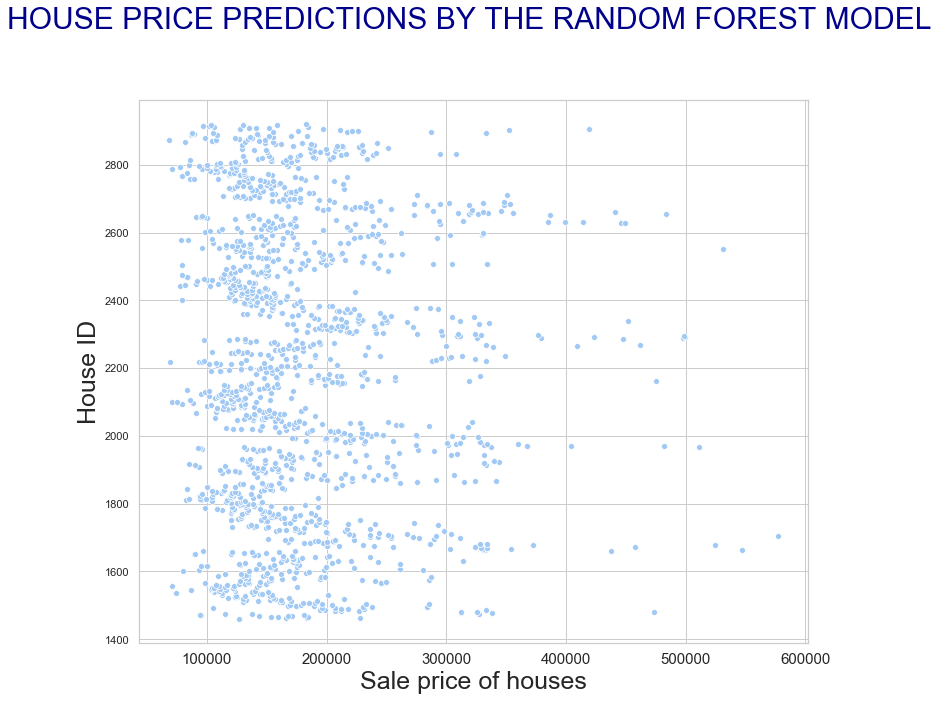

In [90]:
# To plot the results in a scatterplot


plt.figure(figsize=(12,10))

sns.scatterplot(x = 'SalePrice', y = 'Id' , data = solution2 );
plt.xlabel('Sale price of houses' , size = 25)
plt.ylabel('House ID' , size = 25)
plt.xticks(size = 15)
plt.title('HOUSE PRICE PREDICTIONS BY THE RANDOM FOREST MODEL \n\n' , size = 30 , color = 'darkblue')




# The random forest model has predicted house sale prices between the range of 100000 and 200000 as the most dense or the maximum values lie between the range of 100000 and 200000.

# BAGGING

Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Bagging is an Ensemble method which is a meta-algorithm that combines several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.

In [46]:
# import the baggingregressor

bag = BaggingRegressor()


In [47]:
# fit the training data to the model
bag.fit( finaltrain , y)


BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [48]:
# Make the prediction

pred_bag = bag.predict(finaltest)
pred_bag

array([-0.69736186, -0.07870897, -0.05793841, ..., -0.11611361,
       -0.46963494,  0.20359812])

In [49]:
# fit and transform the saleprice or y used as target value in the model

scaledtarget = ss.fit_transform(pd.DataFrame(train.SalePrice))
scaledtarget


array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [50]:
# inverse transform the model

pred_bag = ss.inverse_transform(pred_bag)
pred_bag

array([125540. , 174670.5, 176320. , ..., 171700. , 143625. , 197090. ])

In [51]:
solution3 = pd.DataFrame({"Id" : ID , "SalePrice" : pred_bag})

In [52]:
solution3.head()

,Id,SalePrice
0,1461,125540.0
1,1462,174670.5
2,1463,176320.0
3,1464,189830.0
4,1465,188800.0


In [53]:
# solution3.to_csv("bagmodel.csv", index = False)

Text(0.5,1,'HOUSE PRICE PREDICTIONS BY BAGGING MODEL \n\n')

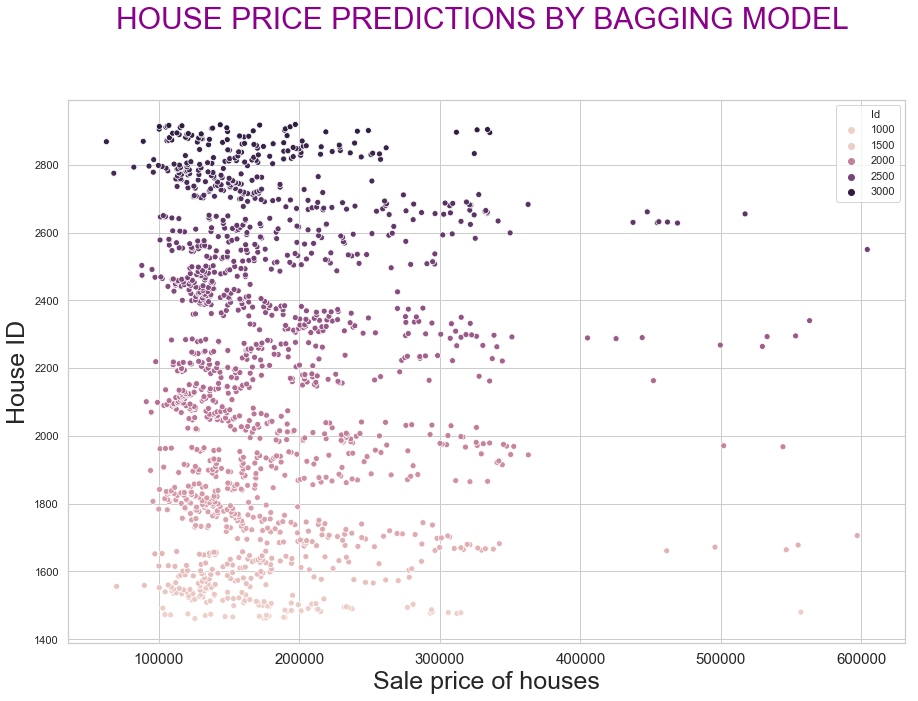

In [94]:
# To plot the results in a scatterplot

plt.figure(figsize=(15,10))
sns.scatterplot(x = 'SalePrice', y = 'Id' , data = solution3, hue = 'Id');
plt.xlabel('Sale price of houses' , size = 25)
plt.ylabel('House ID' , size = 25)
plt.xticks(size = 15)
plt.title('HOUSE PRICE PREDICTIONS BY BAGGING MODEL \n\n' , size = 30 , color = 'darkmagenta')



# After bagging the results of the bagging model look similar to the random forest model where most house prices are betwen the range 100000 and 200000.



# ADABOOST REGRESSOR

ADAboost, short for Adaptive Boosting,was the first really successful boosting algorithm developed for binary classification. It is the best starting point for understanding boosting.AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem.Boosting is an ensemble technique that attempts to create a strong classifier from a number of weak classifiers.A Weak learner is a learner that no matter what the distribution over the training data is will always do better than chance, when it tries to label the data. Doing better than chance means we are always going to have an error rate which is less than 1/2.


In [55]:
# import the adaboost regressor

ada = AdaBoostRegressor()


In [56]:
## fit the training data to the model

ada.fit( finaltrain , y)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [57]:
## Make the prediction

pred_ada = ada.predict(finaltest)


In [58]:
pred_ada

array([-0.41248035,  0.12581526,  0.22677745, ..., -0.07444207,
       -0.36115355,  0.41453849])

In [59]:
# fit and transform the saleprice or y used as target value in the model

scaledtarget = ss.fit_transform(pd.DataFrame(train.SalePrice))
scaledtarget


In [60]:
# # inverse transform the model

ypred = ss.inverse_transform(pred_ada)


In [61]:
ypred

array([148163.9488189 , 190912.85125448, 198930.79329609, ...,
       175009.3574514 , 152240.08118812, 213841.8908686 ])

In [62]:
solution4 = pd.DataFrame({ "Id" : ID , "SalePrice" : ypred})

In [63]:
solution4.head()

,Id,SalePrice
0,1461,148163.948819
1,1462,190912.851254
2,1463,198930.793296
3,1464,212238.306620
4,1465,191869.719298


In [64]:
# solution4.to_csv("adamodel.csv" , index = False)

Text(0.5,1,'HOUSE PRICE PREDICTIONS BY THE ADABOOST REGRESSOR MODEL \n\n')

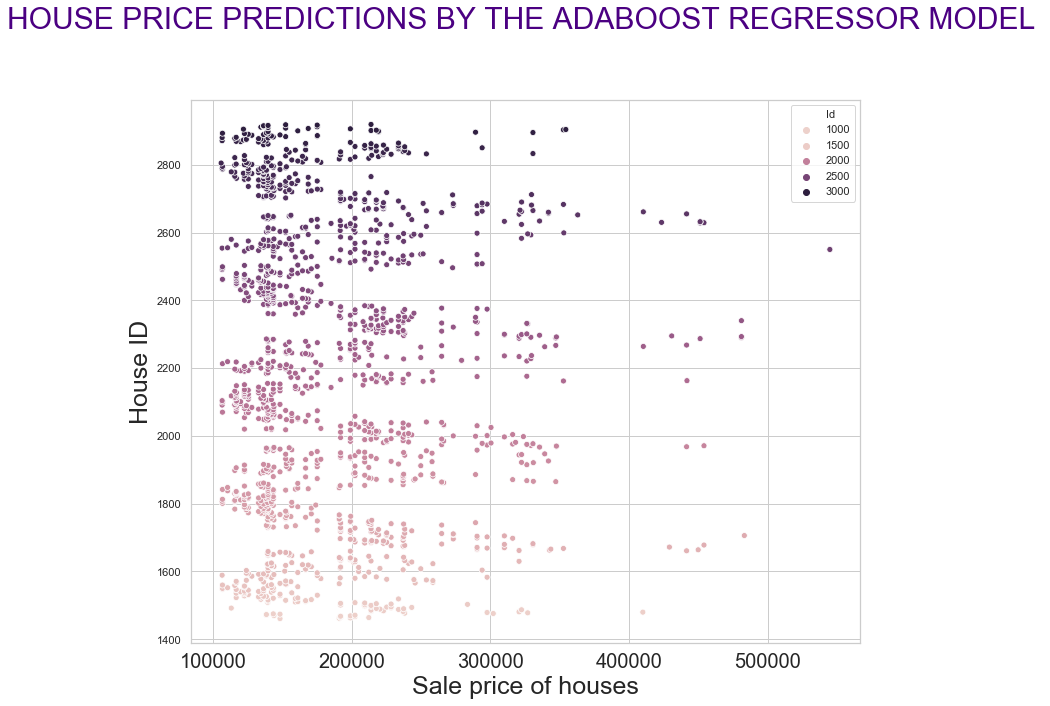

In [92]:
# To plot the results in a scatterplot

plt.figure(figsize=(12,10))
sns.scatterplot(x = 'SalePrice', y = 'Id' , data = solution4, hue = 'Id');
plt.xlabel('Sale price of houses' , size = 25)
plt.ylabel('House ID' , size = 25)
plt.xticks(size =20)
plt.title('HOUSE PRICE PREDICTIONS BY THE ADABOOST REGRESSOR MODEL \n\n' , size = 30 , color = 'indigo')




# The ADAboost model predicts that the majority of houses will be between the selling price of 110000 and 240000 and fewer houses between 240000 and 330000 but this model gives the highest variation in prices amongst all the models.